# **Mestrado Profisional PROFICAM - ITV**

## **Introdução a Visão Computacional**

### Aula 01 - Introdução ao processamento de imagens com OpenCV/Filtros

Documentação extra do OpenCV pode ser visualizada em: https://docs.opencv.org/master/d6/d00/tutorial_py_root.html

Importar as bibliotecas e dependencias necessarias

In [1]:
# import para melhorar a compatibilidade entre python2 e python3 
    
from __future__ import print_function

In [ ]:
# Imports necessários

from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import imutils

import cv2
# from google.colab.patches import cv2_imshow
# cv2_imshow pode ser usado tambem para mostrar imagens ao invez do matplotlib
# so funciona no google colab!
%matplotlib inline

### Tip sobre a documentação de python no google ambiente jupyter/ipython/colab

No notebook de Jypyter as funções podem ser auto completadas usando "tab" diretamente no notebook, ou usando o carater ``?``. 

Por exemplo, para mostrar o conteudo do namespace do numpy pode ser usado a seguinte forma:

```ipython
In [3]: np.<TAB>
```

E para mostrar a documentação interna da função de numpy pode ser usado:

```ipython
In [4]: np?
```

A documentação detalhada, com tutoriais e outros recursos podem ser encontrados em http://www.numpy.org.

In [ ]:
# ao executar esse comando vai mostrar a documentação da função ABS (valor absoluto) do numpy
np.abs?

## Usando OpenCV

Verificar a versão que temos instalada:

In [ ]:
print("OpenCV version:", cv2.__version__)

Inicialmente precisamos clonar o repositorio com as imagens que vamos usar para os experimentos

In [ ]:
# Baixar os arquivos necessários para a aula
!rm -rf intro_cv_proficam
!git clone https://github.com/h3ct0r/intro_cv_proficam
!cp -r intro_cv_proficam/img img

In [ ]:
# Carregar a imagem do dataset
img = cv2.imread('img/mine_worker.jpg')

Temos varias formas de plotar as imagens em OpenCV no ambiente COLAB. Podemos umas uma função de OpenCV diretramente, ou usar uma biblioteca de plots e gráficos chamada Matplotlib.

O que acontece ao plotar cada uma?

In [ ]:
# Plotar imagem
#cv2_imshow(img) # plotar com a funcao de OpenCV diretamente
plt.imshow(img) # plotar usando matplotlib

#### **Análise dos pixels e dos canais de cores**

A imagem plotada com matplotlib tem as cores "extranhas". Isso é pela forma em que as cores são organizadas nas imagens de OpenCV: BGR ao invez de RGB. Para converter para RGB, podemos usar o seguinte comando:

In [ ]:
# converter e plotar imagem em RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [ ]:
# Ver os valores dos pixels em uma posição
img_rgb[0,0]

In [ ]:
# Para visualizar a forma desta imagem e os canais de cor usamos "shape"
img_rgb.shape

In [ ]:
# plotar canais separados VERMELHO
plt.imshow(img_rgb[:, :, 0], cmap='gray')

In [ ]:
# plotar canais separados VERDE
plt.imshow(img_rgb[:, :, 1], cmap='gray')

In [ ]:
# plotar canais separados AZUL
plt.imshow(img_rgb[:, :, 2], cmap='gray')

In [ ]:
# Print shape de um único canal
img_rgb[:, :, 0].shape

In [ ]:
# converter imagem em tons de cinza para facilitar manipulação
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
#cv2_imshow(img_gray)
plt.imshow(img_gray, cmap='gray')

In [ ]:
# Fatiamento da imagem
img_crop = img_gray[170:320, 260:410]
#cv2_imshow(img_crop)
plt.imshow(img_crop, cmap='gray')
img_crop.shape

In [ ]:
# Captando a ROI da imagem
img_roi = img_rgb.copy()
cv2.rectangle(img_roi, (110,170), (540, 610), (255, 0, 0), 4)
cv2.rectangle(img_roi, (420, 250), (550, 450), (0, 0, 198), 4)
#cv2_imshow(img_roi)
plt.imshow(img_roi, cmap='gray')

#### Diferenças em imagens

Será que existe alguma diferença nessas duas imagens da selva? Como podemos saber a diferença entre elas?

In [ ]:
jungle1 = cv2.imread('img/jungle1.jpeg', cv2.IMREAD_GRAYSCALE)
jungle2 = cv2.imread('img/jungle2.jpeg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(14, 9)) 
plt.subplot2grid((1,2),(0,0)) #(linhas, colunas) do grid (l,c) do elemento
plt.title("Jungle 1")
plt.imshow(jungle1, cmap='gray')

plt.subplot2grid((1,2),(0,1)) #(linhas, colunas) do grid (l,c) do elemento
plt.title("Jungle 2")
plt.imshow(jungle2, cmap='gray')

Usando as operações matemáticas matriciais do numpy podemos simplesmente restar as duas imagens!

Dica: Uma outra opção é fazer um for e iterar cada pixel da imagem. Só que isso é mais ineficiente e devagar, as operações matriciais são extremamente otimizadas e devem ser usadas preferencialmente!

In [ ]:
# resta as duas imagens!
diff_jungle = jungle1 - jungle2

plt.figure(figsize=(14, 9))  # define o tamanho total da imagem
plt.subplot2grid((1,3),(0,0)) #(linhas, colunas) do grid (l,c) do elemento
plt.title("Jungle 1")
plt.imshow(jungle1, cmap='gray')

plt.subplot2grid((1,3),(0,1)) #(linhas, colunas) do grid (l,c) do elemento
plt.title("Jungle 2")
plt.imshow(jungle2, cmap='gray')

plt.subplot2grid((1,3),(0,2)) #(linhas, colunas) do grid (l,c) do elemento
plt.title("Difference of both jungle imgs")
plt.imshow(diff_jungle, cmap='gray')

#### **Transformações de imagem**

Como rotacionar e transladar uma imagem?
Como sumar e restar imagens? Mixturar?

In [ ]:
shark = cv2.imread('img/shark.jpg')
shark = cv2.cvtColor(shark, cv2.COLOR_BGR2RGB)

bike = cv2.imread('img/bike.jpg')
bike = cv2.cvtColor(bike, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(14, 9)) 
plt.subplot2grid((1,2),(0,0))
plt.imshow(shark)

plt.subplot2grid((1,2),(0,1))
plt.imshow(bike)

In [ ]:
# somar as duas imagens diretamente satura as cores! (valores dos pixels chegam a 255)
img_sum = shark + bike
plt.imshow(img_sum)

In [ ]:
# para ter uma transição suave podemos colocar pessos nas imagens 
img_sum = shark * 0.2 + bike * 0.8
plt.imshow(np.uint8(img_sum))  # convertemos a imagem de float para int novamente com np.uint8()

In [ ]:
fish = cv2.imread('/content/intro_cv_proficam/img/fish.png', -1)
plt.imshow(fish)

Transladar um objeto numa direção (x, y) podemos usar a matriz de transformação M dada por:

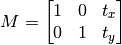

In [ ]:
# transladar o peixe
rows, cols, c = fish.shape
x_offset = 100
y_offset = 30
M = np.float32([[1, 0, x_offset],[0, 1, y_offset]])

print("M:", M)

dst = cv2.warpAffine(fish, M, (cols,rows))

plt.imshow(dst)

A rotação num angulo especifico Tetha é dada pela matriz:

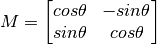

Mas OpenCV fornece uma rotação com escala e centro de rotação ajustavel, assim a imagem pode ser rotacionada desde qualquer ponto. A matriz de rotação modificada vem dada por:

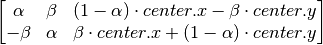

Onde:

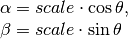

In [ ]:
# rotacionar e escalar o peixe
fish = cv2.imread('/content/intro_cv_proficam/img/fish.png', -1)
rows, cols, c = img.shape

rotation_angle = 45
scale = 1

M = cv2.getRotationMatrix2D((cols/2, rows/2), rotation_angle, scale)

print("M:", M)

dst = cv2.warpAffine(fish, M, (cols, rows))
plt.imshow(dst)

#### **Convertendo canais de cores e segmentando**


![](https://www.researchgate.net/profile/Douglas_Bertol/publication/310474598/figure/fig1/AS:429814134906881@1479487083658/RGB-left-and-HSV-right-color-spaces.png)



- No OpenCV: 
  - Hue (0 - 170)
  - Saturation (0 - 255)
  - Value (0 - 255) -> brilho

In [ ]:
# Carregar imagem das laranjas na esteira
image = cv2.imread("img/laranjas.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [ ]:
# Converter de BGR para HSV

imageHSV = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Definir o range das cores
lower_color = np.array([0, 150, 150])
upper_color = np.array([30, 255, 255])

# Threshold da imagem dentro dos limites minimo e máximo
mask = cv2.inRange(imageHSV, lower_color, upper_color)
    
# Operação de bitwise para comparação entre os valores
res = cv2.bitwise_and(image, image, mask=mask)

# Mostra o resultado
plt.figure(figsize=(14, 9)) 
plt.subplot2grid((1,2),(0,0))
plt.imshow(mask, cmap="gray")

plt.subplot2grid((1,2),(0,1))
plt.imshow(res)

In [ ]:
# Desenhando contornos

# Encontra contornos
cnts = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# Copia da imagem para manter original
imageC = image.copy()

# Desenha contorno por contorno na imagem cópia
for c in cnts:
  cv2.drawContours(imageC, [c], -1, (255, 0, 0), 2)

plt.imshow(imageC)

In [ ]:
# Operação morfológica de erosão para tentar separar as bordas conectadas 

mask2 = cv2.erode(mask, None, iterations=5)
plt.imshow(mask2, cmap="gray")

In [ ]:
# Desenhando contornos após erosão na máscara 2

# Encontra contornos
cnts = cv2.findContours(mask2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# Copia da imagem para manter original
imageC = image.copy()

# Desenha contorno por contorno na imagem cópia
for c in cnts:
  cv2.drawContours(imageC, [c], -1, (0, 0, 0), 2)

plt.imshow(imageC)

In [ ]:
# Encontra contornos e desenha bounding box

mask3 = cv2.erode(mask, None, iterations=7)

contours, _ = cv2.findContours(mask3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Copia da imagem para manter original
imageC = image.copy()

# Encontra contornos
for (i, cnt) in enumerate(contours):
  (x, y, w, h) = cv2.boundingRect(cnt)
  cv2.rectangle(imageC, (x, y), (x + w, y + h), (0, 255, 0), 1)
  cv2.putText(imageC, f'#{i}', (x + int(w/2), y + int(h/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1)

plt.figure(figsize=(14, 9)) 
plt.subplot2grid((1,2),(0,0))
plt.imshow(mask3, cmap="gray")

plt.subplot2grid((1,2),(0,1))
plt.imshow(imageC)

#### **Filtros**

- Filtros de suavização

In [ ]:
# Ver imagem
image = cv2.imread("img/laranjas.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(14, 9)) 
plt.imshow(image)

In [ ]:
# Blur pela média dos pixels sob o filtro: substitui o pixel central

imageB = cv2.blur(image, ksize=(10, 10))

plt.figure(figsize=(14, 9)) 
plt.imshow(imageB)

In [ ]:
# Suavização pelo filtro gaussiano (Ímpar)

imageG = cv2.GaussianBlur(image, (11, 11), 0)

plt.figure(figsize=(14, 9)) 
plt.imshow(imageG)

In [ ]:
# Suavização pela mediana (Ímpar)

imageM = cv2.medianBlur(image, 11)

plt.figure(figsize=(14, 9)) 
plt.imshow(imageM)

In [ ]:
def noisy(noise_typ, image):
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 200
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.04
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
                for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
                for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy

In [ ]:
lenna = cv2.imread('img/lenna.png')
lenna = cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(14, 9)) 
plt.imshow(lenna)

In [ ]:
# adicionar ruido gaussiano e "salt and pepper"
lenna_noise_gaus = noisy("gauss", lenna)
img_float32 = np.float32(lenna_noise_gaus)
lenna_noise_gaus = cv2.cvtColor(img_float32, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(14, 9)) 
cv2_imshow(lenna_noise_gaus)

In [ ]:
# Aplica filtro gaussiano na imagem para minimizar o ruido gaussiano
imageG = cv2.GaussianBlur(lenna_noise_gaus, (3, 3), 0)

plt.figure(figsize=(14, 9)) 
plt.subplot2grid((1,2),(0,0))
plt.imshow(lenna_noise_gaus, cmap="gray")

plt.subplot2grid((1,2),(0,1))
plt.imshow(imageG, cmap="gray")

In [ ]:
# adicionar ruido "salt and pepper"
lenna_noise_sp = noisy("s&p", lenna)
lenna_noise_sp = cv2.cvtColor(lenna_noise_sp, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(14, 9)) 
plt.imshow(lenna_noise_sp, cmap="gray")

In [ ]:
# filtro da mediana para diminuir o ruido S&P
print(lenna_noise_sp.shape)
imageM = cv2.medianBlur(lenna_noise_sp, 3)

plt.figure(figsize=(14, 9)) 
plt.subplot2grid((1,2),(0,0))
plt.imshow(lenna_noise_sp, cmap="gray")

plt.subplot2grid((1,2),(0,1))
plt.imshow(imageM, cmap="gray")

#### **Contar moedas**

In [ ]:
img = cv2.imread('img/moedas.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(14, 9)) 
plt.imshow(img)

In [ ]:
imgHSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

mask1 = cv2.inRange(imgHSV, (15, 10, 10), (36, 250, 200))

mask2 = cv2.inRange(imgHSV, (0, 100, 10), (20, 150, 100))

mask = cv2.bitwise_or(mask1, mask2)

plt.figure(figsize=(18, 18)) 
plt.subplot2grid((1,3),(0,0))
plt.imshow(mask1, cmap="gray")

plt.subplot2grid((1,3),(0,1))
plt.imshow(mask2, cmap="gray")

plt.subplot2grid((1,3),(0,2))
plt.imshow(mask, cmap="gray")

In [ ]:
kernel = np.ones((3, 3),np.uint8)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

plt.imshow(opening, cmap="gray")

In [ ]:
dilation = cv2.dilate(opening, kernel,iterations=7)

plt.imshow(dilation, cmap="gray")

In [ ]:
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

plt.imshow(img, cmap="gray")

print("Quantas moedas foram encontradas?:", len(contours))